In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading dataset
data = pd.read_csv("/content/heart.csv")

1.   Age: age of the patient [years]

2.   Sex: sex of the patient [M: Male, F: Female]

3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4.   RestingBP: resting blood pressure [mm Hg]

5.   Cholesterol: serum cholesterol [mm/dl]

6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10.   Oldpeak: oldpeak = ST [Numeric value measured in depression]

11.   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12.   HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
# define a function to look at the dataset
def check_df(data):
  print(">>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<")
  print(data.shape)
  print(">>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<")
  print(data.info())
  print(">>>>>>>>>>>>>>>>>>>corr<<<<<<<<<<<<<<<<<<<")
  print(data.corr())
  print(">>>>>>>>>>>>>>>>>>>describe<<<<<<<<<<<<<<<")
  print(data.describe())
  print(">>>>>>>>>>>>>>>>>>>dtypes<<<<<<<<<<<<<<<<<<<")
  print(data.dtypes)
  print(">>>>>>>>>>>>>>>>>>>columns<<<<<<<<<<<<<<<<<<<")
  print(data.columns)
  print(">>>>>>>>>>>>>>>>>>>head<<<<<<<<<<<<<<<<<<<")
  print(data.head())
  print(">>>>>>>>>>>>>>>>>>>tail<<<<<<<<<<<<<<<<<<<")
  print(data.tail())

check_df(data)

>>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<
(918, 12)
>>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
>>>>>>>>>>>>>>>>>>>corr<<<<<<<<<<<<<<<<<<<
                   Age  RestingBP  Cholesterol  FastingBS

In [ ]:
# sum of missing values in the data set
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Visualize the features using histograms
data.hist(figsize=(20,25))
plt.show()

NameError: ignored

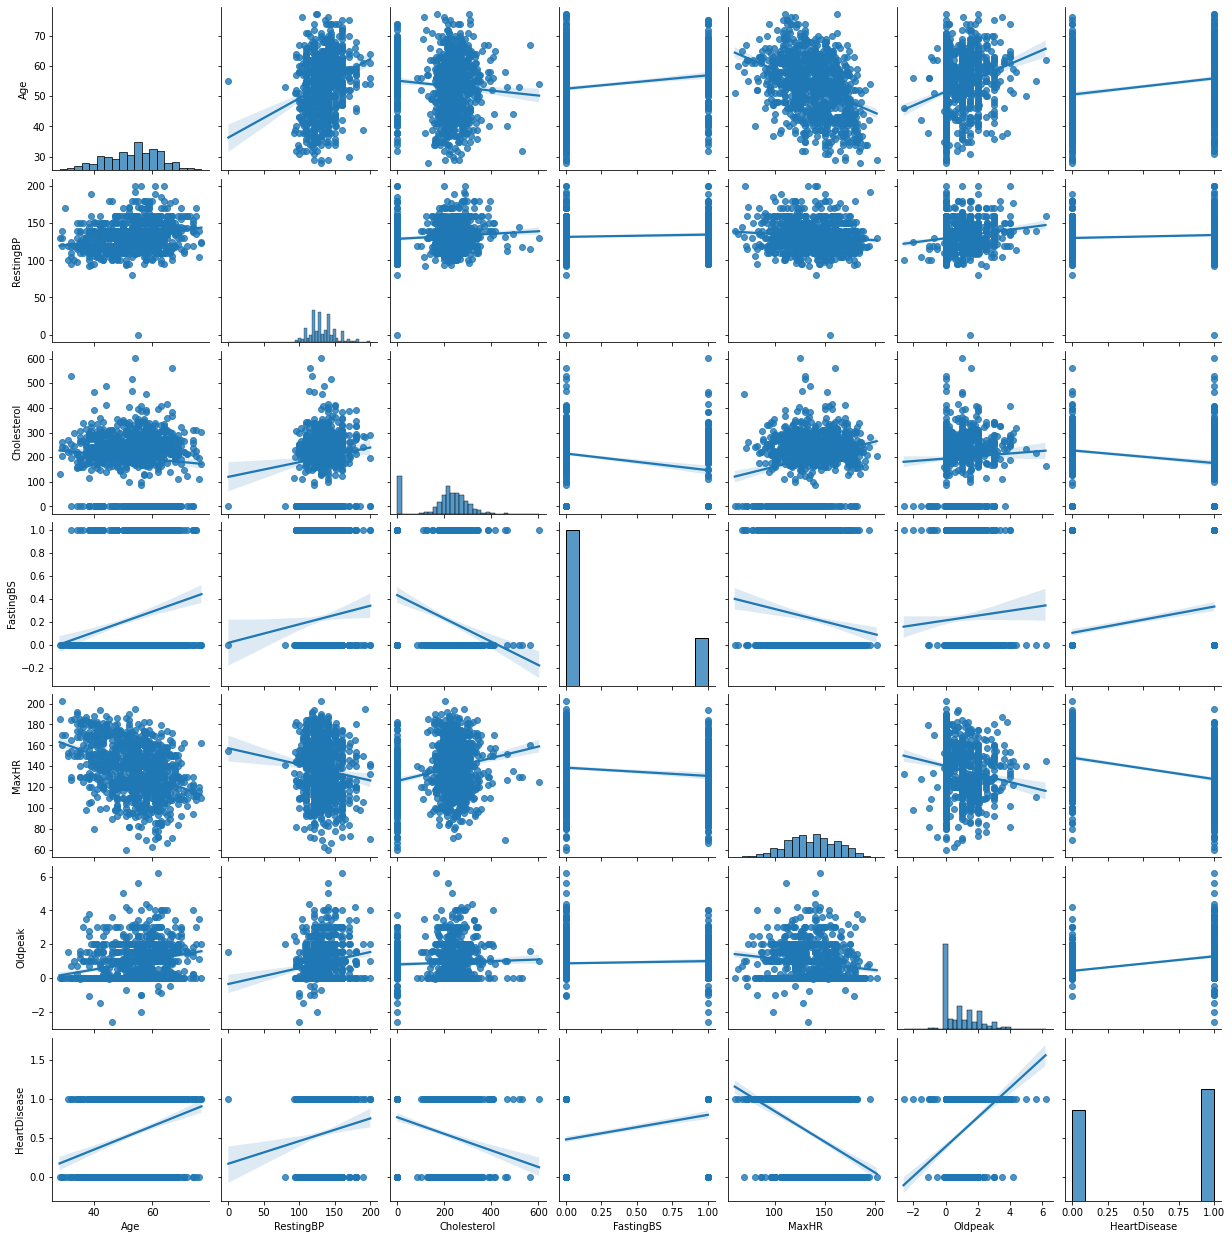

In [ ]:
# Visualize the features using pairplot
sns.pairplot(data,kind="reg")

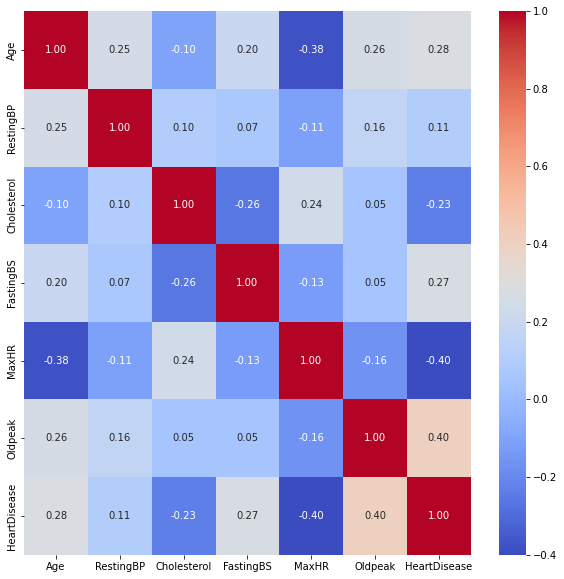

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',cbar=True,fmt=".2f")
plt.show()

In [ ]:
# pre-processing
# map encoding
encoding_map = {'Sex': {'M': 0, 'F': 1},
                'ChestPainType': {'TA':0, 'ATA':1, 'NAP':2,'ASY':3},
                'RestingECG': {'Normal':0, 'ST':1, 'LVH':2},
                'ExerciseAngina': {'Y':0, 'N':1},
                'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2},
                }
data.replace(encoding_map, inplace=True)

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,1,0.0,0,0
1,49,1,2,160,180,0,0,156,1,1.0,1,1
2,37,0,1,130,283,0,1,98,1,0.0,0,0
3,48,1,3,138,214,0,0,108,0,1.5,1,1
4,54,0,2,150,195,0,0,122,1,0.0,0,0
5,39,0,2,120,339,0,0,170,1,0.0,0,0
6,45,1,1,130,237,0,0,170,1,0.0,0,0
7,54,0,1,110,208,0,0,142,1,0.0,0,0
8,37,0,3,140,207,0,0,130,0,1.5,1,1
9,48,1,1,120,284,0,0,120,1,0.0,0,0


In [ ]:
# Separate the data, test and train
from sklearn.model_selection import train_test_split

X=data.drop(axis=1,columns="HeartDisease")
y=data["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Using MinMaxScaler, we scaled the numeric values in our data between 0-1
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train[['Age',  'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] =scaler.fit_transform(X_train[['Age',  'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])
X_test[['Age',  'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]=scaler.transform(X_test[['Age',  'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])


In [ ]:
# check X_train data
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
585,0.583333,0,1,0.90,0.472637,1.0,1,0.424,1,0.386364,1
169,0.604167,0,2,0.70,0.296849,0.0,0,0.744,1,0.295455,0
602,0.666667,0,2,0.60,0.558872,0.0,0,0.248,0,0.295455,1
140,0.479167,0,3,0.80,0.548922,0.0,0,0.216,0,0.579545,1
173,0.416667,0,2,0.70,0.310116,0.0,0,0.840,1,0.295455,0
...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,1,3,0.60,0.421227,0.0,1,0.344,1,0.295455,0
270,0.333333,0,3,0.60,0.373134,0.0,0,0.584,1,0.295455,0
860,0.645833,0,3,0.65,0.419569,0.0,0,0.616,0,0.454545,0
435,0.645833,0,3,0.76,0.000000,0.0,1,0.408,0,0.295455,0


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# pre-processing
# label encoding
# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Encoding the categorical features
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['ChestPainType'] = le.fit_transform(X['ChestPainType'])
X['RestingECG'] = le.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le.fit_transform(X['ST_Slope'])

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the top 11 features using ANOVA F-value
selector = SelectKBest(f_classif, k=11)
X_new = selector.fit_transform(X_scaled, y)
selected_features = np.array(X.columns)[selector.get_support()]

# Print the selected features
print(selected_features)

['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


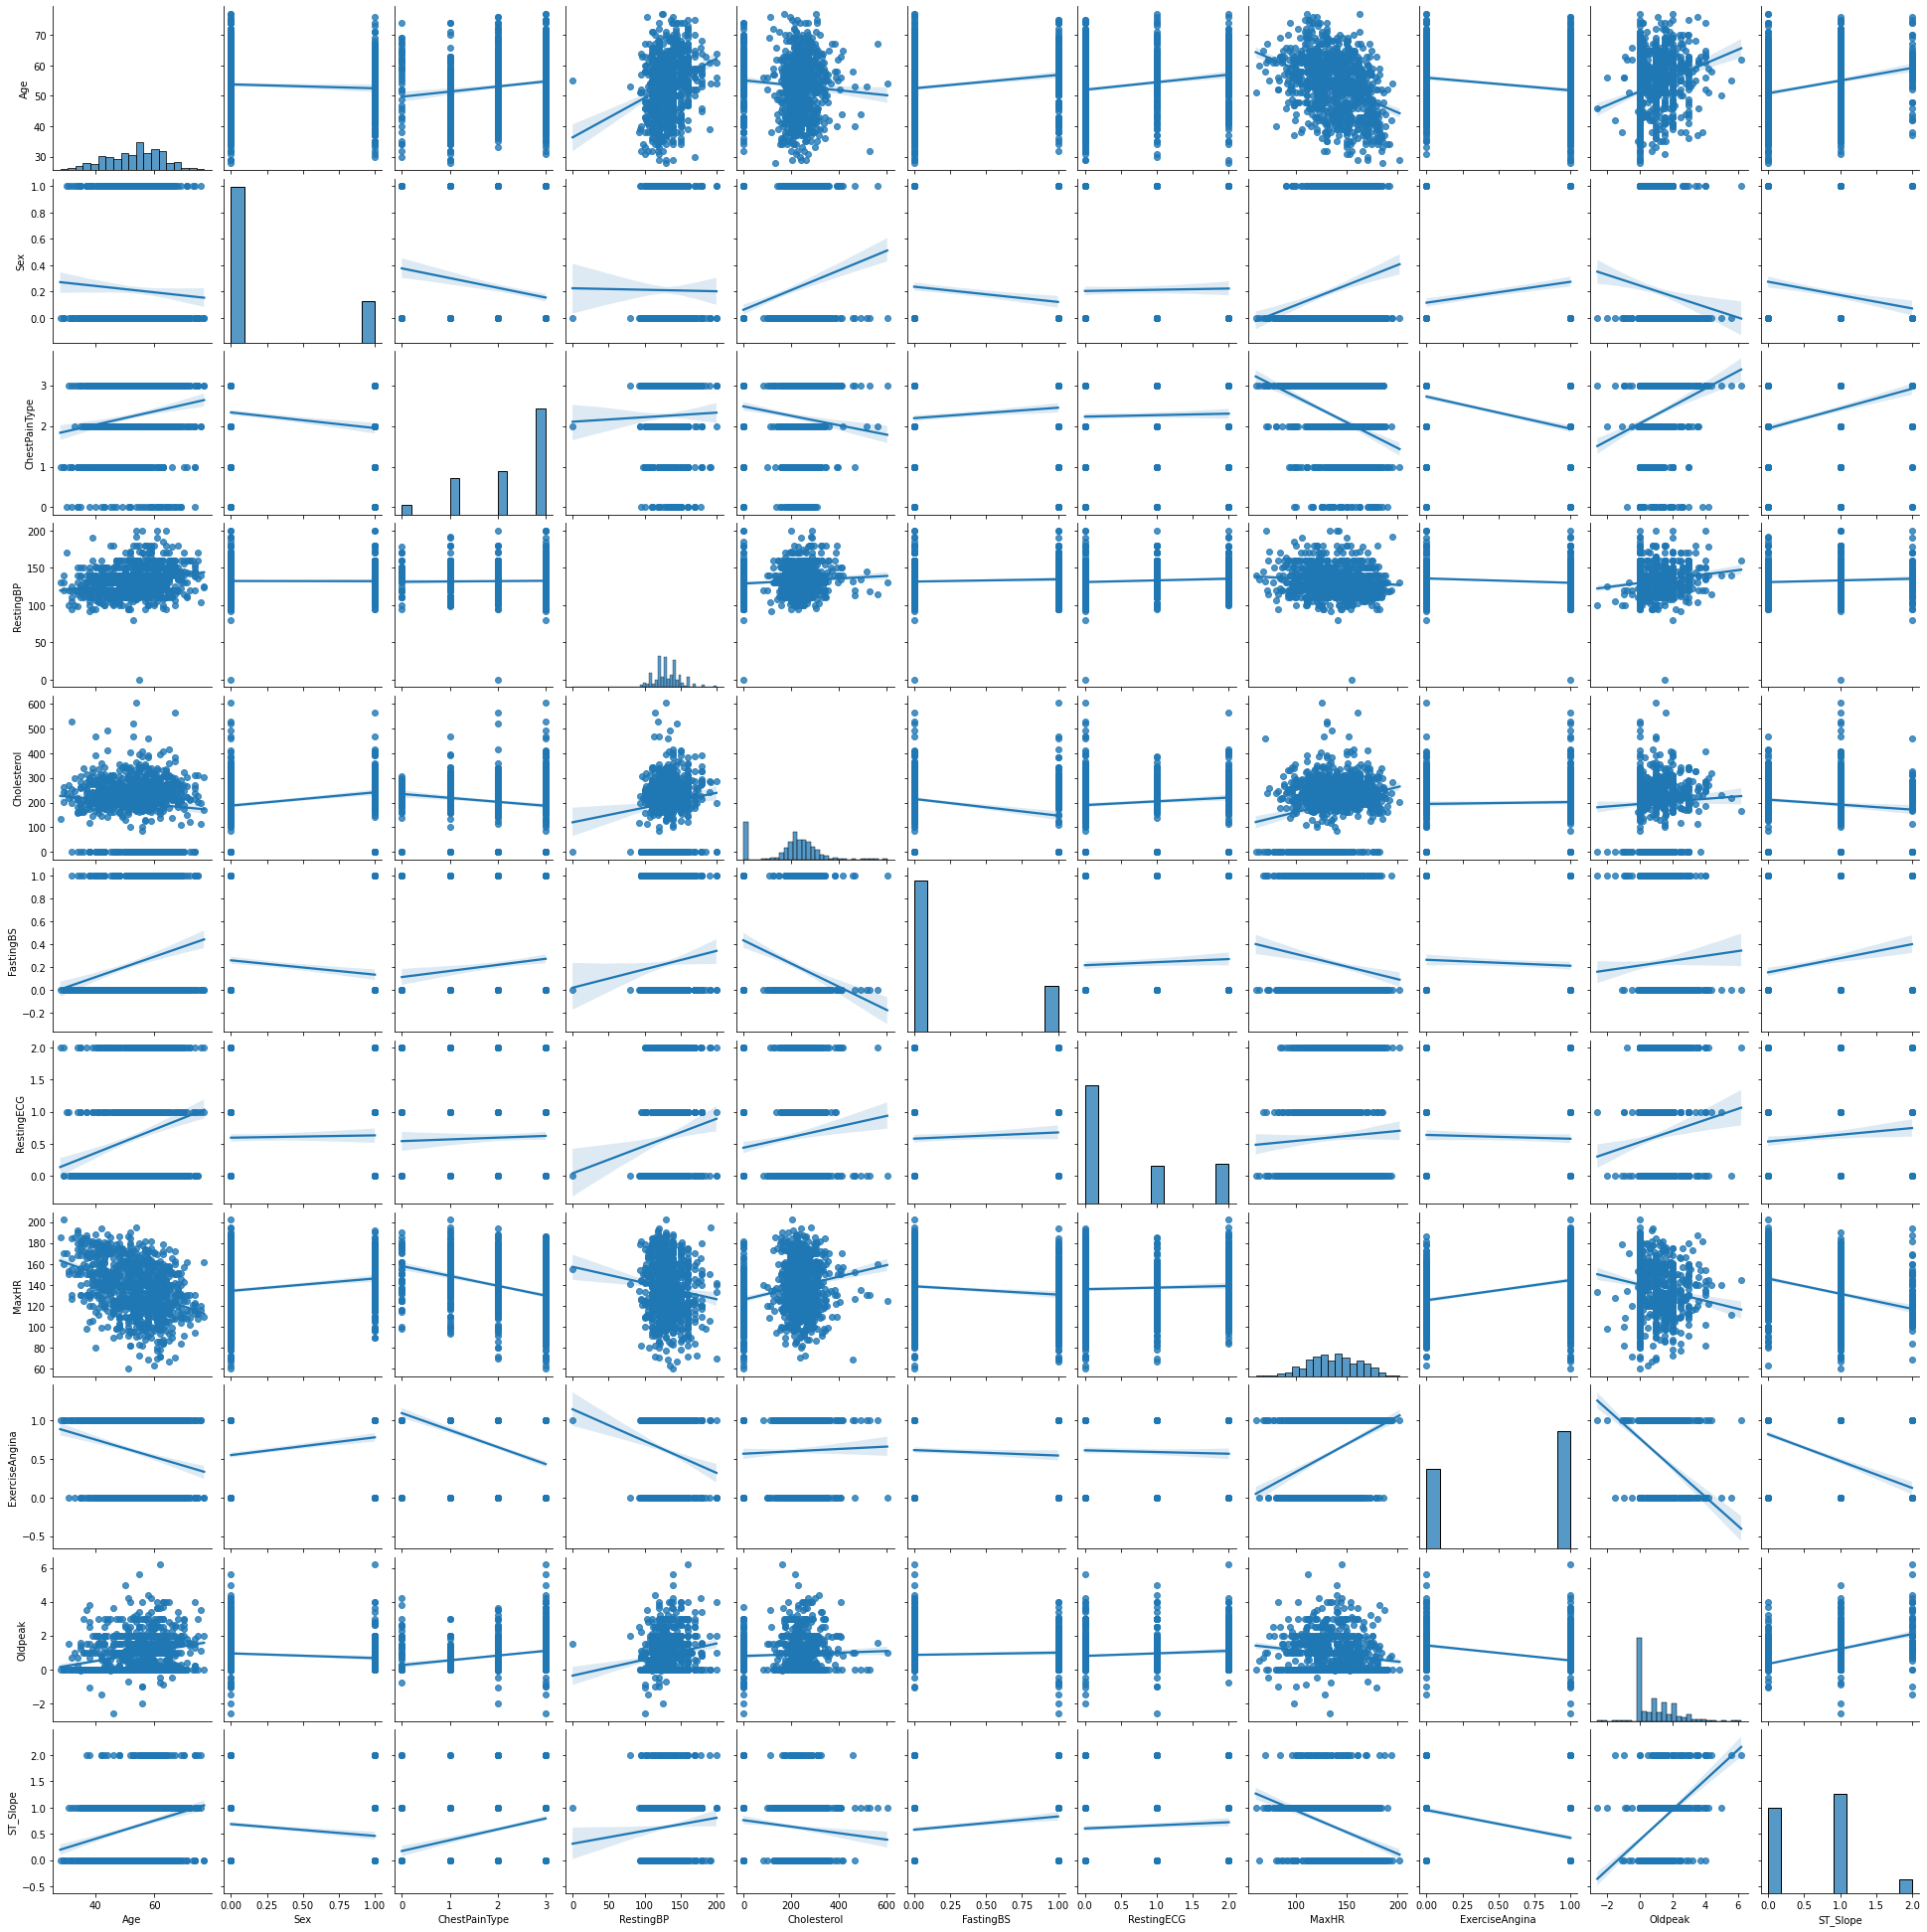

In [ ]:
# Visualize the features using pairplot
sns.pairplot(data[selected_features],kind="reg")